# Set Up

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import pi

# Results

In [3]:
# Zero Shot Prompts

zero_qa_metrics = {
    "Prompt": ["Plain", "Cite Source", "Context", "Few-shot"],
    "Exact Match": [0.075206, 0.075206, 0.07617, 0.09073],
    "F1": [0.037603, 0.037603, 0.03808, 0.04536]
}

zero_sum_metrics = {
    "Prompt": ["Plain", "Cite Source", "Few-shot"],
    "ROUGE-1": [0.29166, 0.29219, 0.25506],
    "ROUGE-2": [0.11484, 0.11450, 0.091968],
    "ROUGE-L": [0.22580, 0.22578, 0.19799],
    "BERT_F1": [0.21141, 0.20567, 0.18712],
    "Flesch_Kincaid": [16.376, 16.412, 17.069]
}

# Convert each metric group into DataFrames
zero_qa_df = pd.DataFrame(zero_qa_metrics)
zero_sum_df = pd.DataFrame(zero_sum_metrics)

# Melt both DataFrames into long format
zero_qa_long = zero_qa_df.melt(id_vars=["Prompt"],
                     var_name="Metric",
                     value_name="Score")
zero_qa_long["Task"] = "QA"

zero_sum_long = zero_sum_df.melt(id_vars=["Prompt"],
                      var_name="Metric",
                      value_name="Score")
zero_sum_long["Task"] = "Summarisation"

# Combine them
zero_results_df = pd.concat([zero_qa_long, zero_sum_long], ignore_index=True)

# Reorder columns for readability
zero_results_df = zero_results_df[["Prompt", "Task", "Metric", "Score"]]

# View
zero_results_df.head()

,Prompt,Task,Metric,Score
0,Plain,QA,Exact Match,0.075206
1,Cite Source,QA,Exact Match,0.075206
2,Context,QA,Exact Match,0.076170
3,Few-shot,QA,Exact Match,0.090730
4,Plain,QA,F1,0.037603


In [4]:
# Separate out Flesch-Kincaid
zero_sum_df = zero_results_df[zero_results_df["Task"] == "Summarisation"]

# Split into two DataFrames
zero_fk_df = zero_sum_df[zero_sum_df["Metric"] == "Flesch_Kincaid"]
zero_other_df = zero_sum_df[zero_sum_df["Metric"] != "Flesch_Kincaid"]

In [2]:
# All Models

qa_metrics = {
    "Model": ["Zero-Shot", "Fine-Tuned", "RAG"],
    "Exact Match": [0.09073, 0.955847, 0.438055],
    "F1": [0.04536, 0.837921, 0.362707]
}

sum_metrics = {
    "Model": ["Zero-Shot", "Fine-Tuned", "RAG"],
    "ROUGE-1": [0.29166, 0.324243, 0.2714],
    "ROUGE-2": [0.11484, 0.134636, 0.0980],
    "ROUGE-L": [0.22580, 0.254828, 0.2112],
    "BERT_F1": [0.21141, 0.879741, 0.8661],
    "Flesch_Kincaid": [16.3765, 15.9636, 15.5416]
}

# Convert each metric group into DataFrames
qa_df = pd.DataFrame(qa_metrics)
sum_df = pd.DataFrame(sum_metrics)

# Melt both DataFrames into long format
qa_long = qa_df.melt(id_vars=['Model'],
                     var_name="Metric",
                     value_name="Score")
qa_long["Task"] = "QA"

sum_long = sum_df.melt(id_vars=['Model'],
                      var_name="Metric",
                      value_name="Score")
sum_long["Task"] = "Summarisation"

# Combine them
results_df = pd.concat([qa_long, sum_long], ignore_index=True)

# Reorder columns for readability
results_df = results_df[["Model", "Task", "Metric", "Score"]]

# View
results_df


,Model,Task,Metric,Score
0,Zero-Shot,QA,Exact Match,0.090730
1,Fine-Tuned,QA,Exact Match,0.955847
2,RAG,QA,Exact Match,0.438055
3,Zero-Shot,QA,F1,0.045360
4,Fine-Tuned,QA,F1,0.837921
5,RAG,QA,F1,0.362707
6,Zero-Shot,Summarisation,ROUGE-1,0.291660
7,Fine-Tuned,Summarisation,ROUGE-1,0.324243
8,RAG,Summarisation,ROUGE-1,0.271400
9,Zero-Shot,Summarisation,ROUGE-2,0.114840


In [5]:
# Separate out Flesch-Kincaid
qa_df = results_df[results_df["Task"] == "QA"]
sum_df = results_df[results_df["Task"] == "Summarisation"]

# Split into two DataFrames
fk_df = sum_df[sum_df["Metric"] == "Flesch_Kincaid"]
other_df = sum_df[sum_df["Metric"] != "Flesch_Kincaid"]

In [6]:
prompt_colours = {
    "Plain": '#1f77b4',
    "Cite Source": '#ff7f0e',
    "Context": '#2ca02c',
    "Few-shot": '#d62728'
}
sns.set_theme(style="whitegrid")

In [7]:
model_colours = {
    "Zero-Shot": 'salmon',
    "Fine-Tuned": 'deepskyblue',
    "RAG": 'gold'
}
sns.set_theme(style="whitegrid")

# Plots

## Prompting Type for Zero Shot

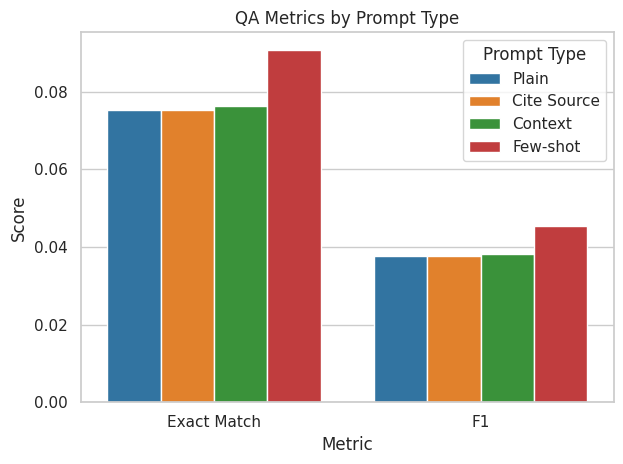

In [8]:
# QA
sns.barplot(
    data=zero_results_df[zero_results_df["Task"] == "QA"],
    x="Metric", y="Score", hue="Prompt",
    palette=prompt_colours
)
plt.title("QA Metrics by Prompt Type")
plt.xlabel("Metric")
plt.ylabel("Score")
plt.legend(title="Prompt Type")
plt.tight_layout()
plt.show()

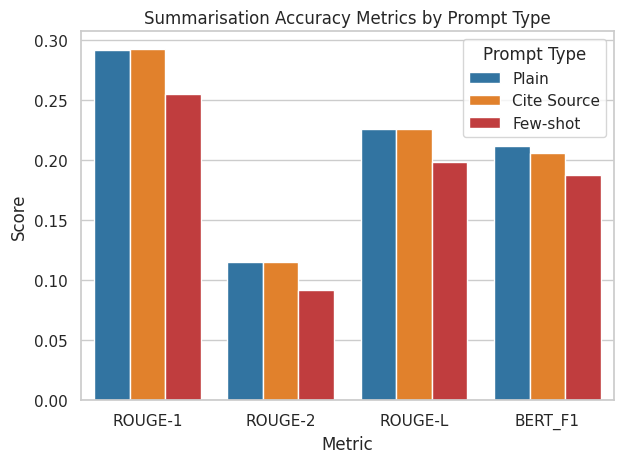

In [ ]:
sns.barplot(
    data=zero_other_df,
    x="Metric", y="Score", hue="Prompt",
    palette=prompt_colours
)
plt.title("Summarisation Accuracy Metrics by Prompt Type")
plt.xlabel("Metric")
plt.ylabel("Score")
plt.legend(title="Prompt Type")
plt.tight_layout()
plt.show()


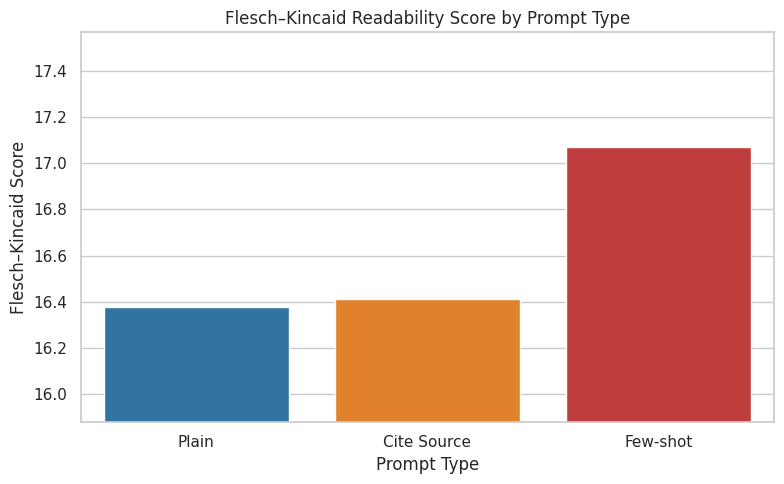

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=zero_fk_df,
    x="Prompt", y="Score", hue="Prompt", palette=prompt_colours
)
plt.title("Flesch–Kincaid Readability Score by Prompt Type")
plt.ylim(min(zero_fk_df["Score"]) - 0.5, max(zero_fk_df["Score"]) + 0.5)  # narrow y-range
plt.xlabel("Prompt Type")
plt.ylabel("Flesch–Kincaid Score")
plt.tight_layout()
plt.show()

## Bar plot by Models

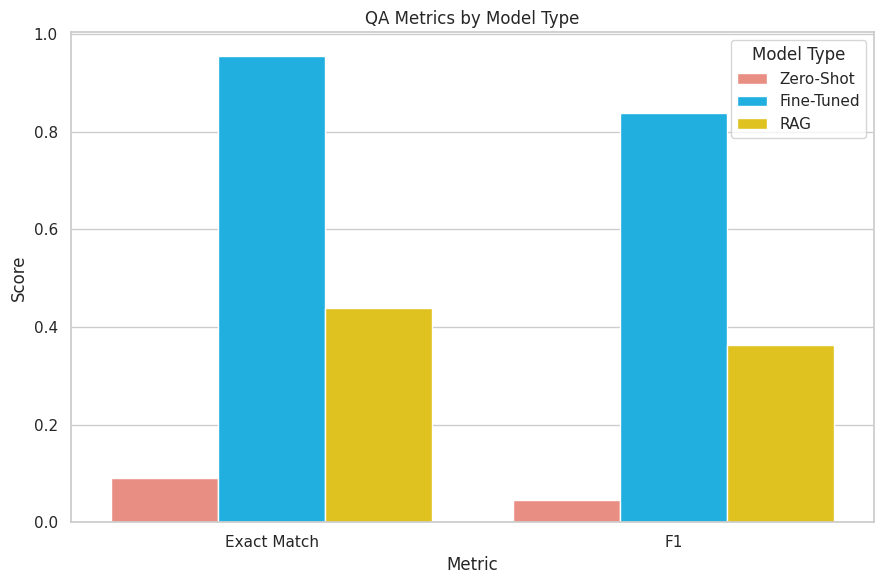

In [11]:
# QA
plt.figure(figsize=(9, 6))
sns.barplot(
    data=qa_df,
    x="Metric", y="Score", hue="Model",
    palette=model_colours
)

plt.title("QA Metrics by Model Type")
plt.xlabel("Metric")
plt.ylabel("Score")
plt.legend(title="Model Type")
plt.tight_layout()
plt.show()

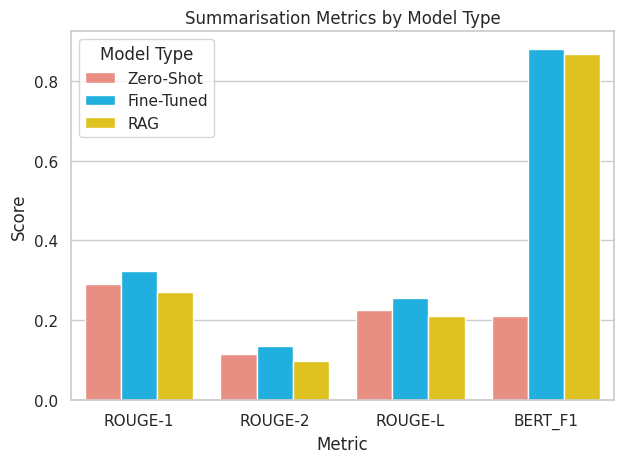

In [12]:
sns.barplot(
    data=other_df,
    x="Metric", y="Score", hue="Model",
    palette=model_colours
)
plt.title("Summarisation Metrics by Model Type")
plt.xlabel("Metric")
plt.ylabel("Score")
plt.legend(title="Model Type")
plt.tight_layout()
plt.show()

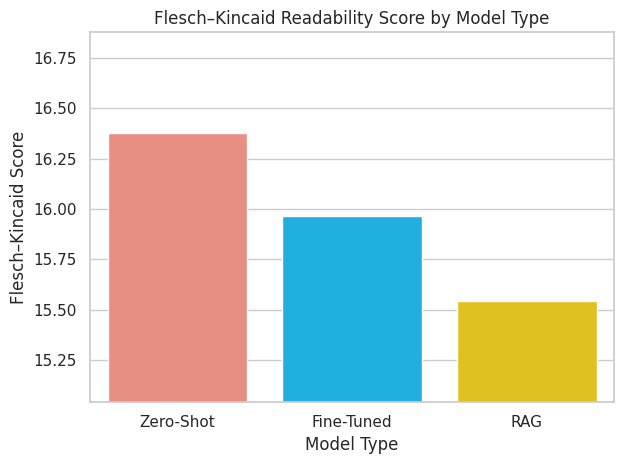

In [13]:
sns.barplot(
    data=fk_df,
    x="Model", y="Score", hue="Model", palette=model_colours
)
plt.title("Flesch–Kincaid Readability Score by Model Type")
plt.ylim(min(fk_df["Score"]) - 0.5, max(fk_df["Score"]) + 0.5)  # narrow y-range
plt.xlabel("Model Type")
plt.ylabel("Flesch–Kincaid Score")
plt.tight_layout()
plt.show()

## Radar Chart comparing models

In [15]:
# Copy the dataframe to avoid modifying original
df_scaled = results_df.copy()

df_scaled.loc[df_scaled['Metric'] == 'Flesch_Kincaid', 'Score'] = (
    df_scaled.loc[df_scaled['Metric'] == 'Flesch_Kincaid', 'Score'] / 100
)

df_scaled

,Model,Task,Metric,Score
0,Zero-Shot,QA,Exact Match,0.090730
1,Fine-Tuned,QA,Exact Match,0.955847
2,RAG,QA,Exact Match,0.438055
3,Zero-Shot,QA,F1,0.045360
4,Fine-Tuned,QA,F1,0.837921
5,RAG,QA,F1,0.362707
6,Zero-Shot,Summarisation,ROUGE-1,0.291660
7,Fine-Tuned,Summarisation,ROUGE-1,0.324243
8,RAG,Summarisation,ROUGE-1,0.271400
9,Zero-Shot,Summarisation,ROUGE-2,0.114840


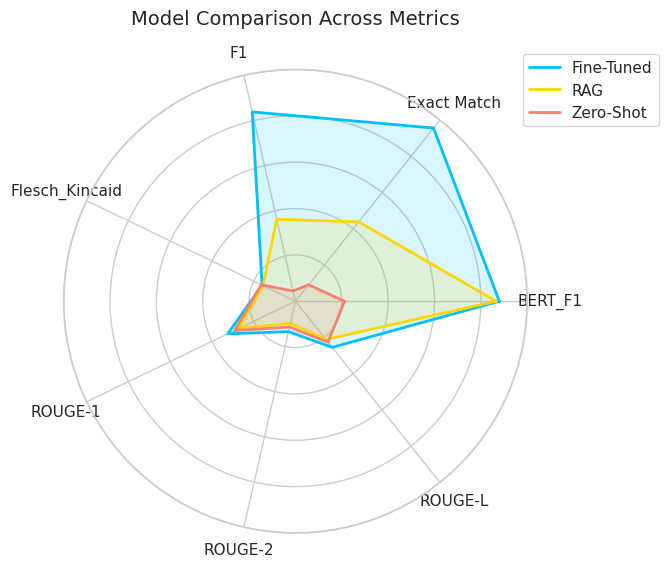

In [16]:
df_pivot = df_scaled.pivot(index='Model', columns='Metric', values='Score')

def plot_model_radar(df_pivot, title="Model Comparison Across Metrics"):
    metrics = df_pivot.columns.tolist()
    num_metrics = len(metrics)
    angles = np.linspace(0, 2*np.pi, num_metrics, endpoint=False).tolist()
    angles += angles[:1]  # close the loop

    plt.figure(figsize=(7,7))
    ax = plt.subplot(111, polar=True)

    handles, labels = [], []

    for model, row in df_pivot.iterrows():
        values = row.tolist()
        values += values[:1]

        # use color from dictionary; default to gray if not found
        color = model_colours.get(model, 'gray')

        line, = ax.plot(angles, values, color=color, linewidth=2, label=model)
        ax.fill(angles, values, color=color, alpha=0.15)

        handles.append(line)
        labels.append(model)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)
    ax.set_ylim(0, 1)
    ax.set_yticklabels([])

    plt.title(title, size=14, y=1.08)
    ax.legend(handles=handles, labels=labels, loc='upper right', bbox_to_anchor=(1.3, 1.05))

    plt.tight_layout()
    plt.show()

plot_model_radar(df_pivot)
